## Project 1 - Word Cloud

For this project, we'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of our script, we will need to provide a file that contains text only.  For the text itself, we can copy and paste the contents of a website we like.  We could see what word clouds we can get from famous books. Save this as a .txt file somewhere on your computer.

Now we will need to upload your input file here so that our script will be able to process it.  To do the upload, we will need an uploader widget.  Run the following cell to perform all the installs and imports for our word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once we get the following final line of output, the code is done executing. Then we can continue on with the rest of the instructions for this notebook.


In [6]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\ProgramData\Anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\somak\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\somak\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\somak\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [7]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Now we will write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word and also it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then we will use it in the `generate_from_frequencies` function to generate our very own word cloud!
<br><br>


In [8]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    file_contents = file_contents.strip()
    file_contents = file_contents.lower()
    remove_punctuations = str.maketrans(punctuations, 28*" ")
    file_contents = file_contents.translate(remove_punctuations)    
    file_contents = file_contents.split()
    result = {}
    for words in file_contents:
        if words not in result and words.isalpha() and words.lower() not in uninteresting_words:
            result[words.lower()] = 0
        if words.isalpha() and words.lower() not in uninteresting_words:
            words = words.lower()
            result[words.lower()] += 1

    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies=result)
    return cloud.to_array()

Our word cloud image should appear after running the cell below

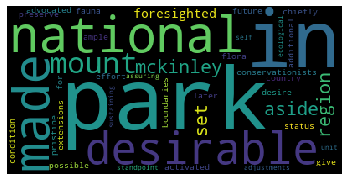

In [9]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()